# Stroke Prediction

### Dataset

https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

### Context

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

### Attribute Information

1. id: unique identifier
2. gender: "Male", "Female" or "Other"
3. age: age of the patient
4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6. ever_married: "No" or "Yes"
7. work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8. Residence_type: "Rural" or "Urban"
9. avg_glucose_level: average glucose level in blood
10. bmi: body mass index
11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12. stroke: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient*

### Libraries

In [256]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import RobustScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
warnings.simplefilter(action='ignore', category=Warning)

### Load Dataset

In [257]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

## Exploratory Data Analysis

In [258]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [259]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [260]:
df.shape

(5110, 12)

### Missing Values

In [261]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

*There is 201 null value in bmi*

In [262]:
(df["bmi"].isnull().sum() / df.shape[0]) * 100

3.9334637964774952

*Ratio of missing values in bmi is %3.93*

<AxesSubplot:>

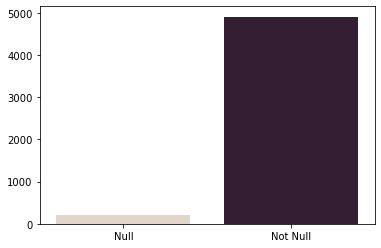

In [263]:
sns.barplot(data=df, x=["Null", "Not Null"], y=[df["bmi"].isnull().sum(), df["bmi"].notnull().sum()], palette="ch:.25")

### Categorical and Numerical Variables

In [264]:
def col_names(df):
    #Categorical Variables
    cat_cols = [col for col in df.columns if df[col].dtypes not in ["int64", "float64"]]
    #Numerical Variables
    num_cols = [col for col in df.columns if df[col].dtypes in ["int64", "float64"]]
    #Numerical but Categorical Variables
    num_but_cat = [col for col in num_cols if df[col].nunique() < 12]
    #Adding num_but_cat to cat_cols
    cat_cols = num_but_cat + cat_cols
    #num_but_cat removing from num_cols
    num_cols = [col for col in num_cols if col not in num_but_cat]
    #Categorical but Cardinal Variables
    cat_but_car = [col for col in cat_cols if df[col].nunique() > 12]
    print(f"Numerical Cols: {num_cols} \nCategorical Cols: {cat_cols} \nNumerical but Categorical: {num_but_cat} \nCategorical but Cardinal: {cat_but_car}") 
    return num_cols, cat_cols

In [265]:
num_cols, cat_cols = col_names(df)

Numerical Cols: ['id', 'age', 'avg_glucose_level', 'bmi'] 
Categorical Cols: ['hypertension', 'heart_disease', 'stroke', 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'] 
Numerical but Categorical: ['hypertension', 'heart_disease', 'stroke'] 
Categorical but Cardinal: []


### Analyzing Numerical Variables

In [266]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60


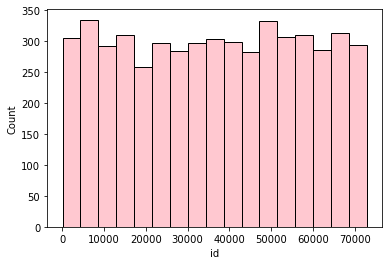

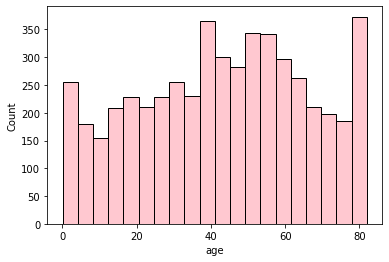

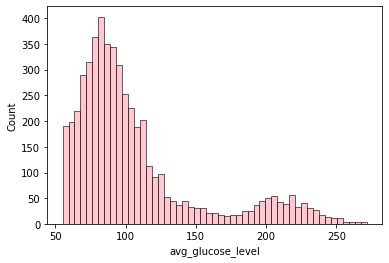

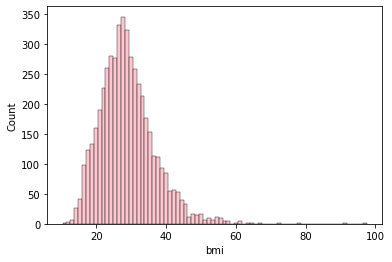

In [267]:
for col in num_cols:
    sns.histplot(x=df[col], data=df, color="lightpink")
    plt.show(block=True)

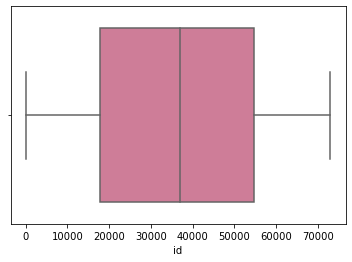

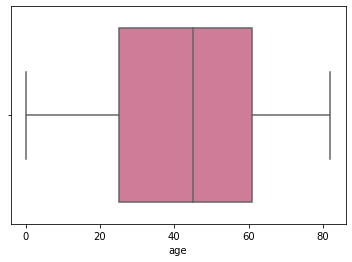

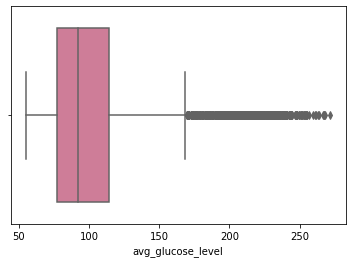

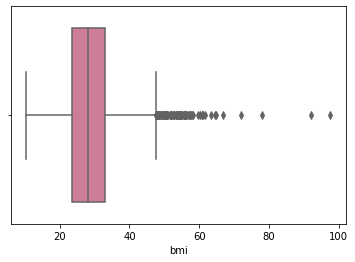

In [268]:
for col in num_cols:
    sns.boxplot(x=df[col], data=df, color="palevioletred")
    plt.show(block=True)

### Analyzing Categorical Variables

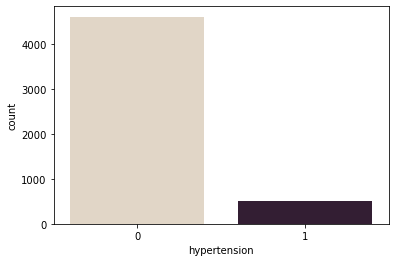

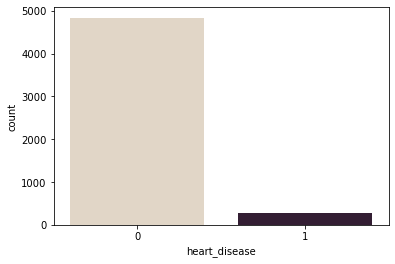

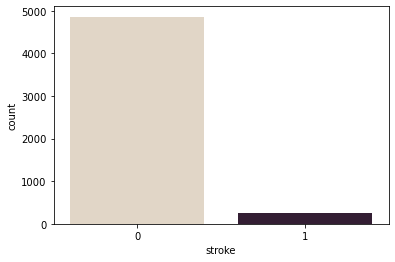

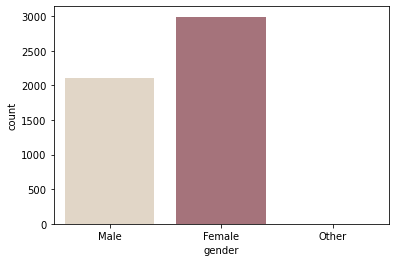

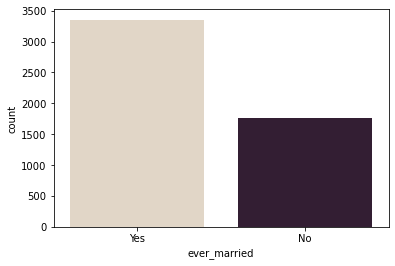

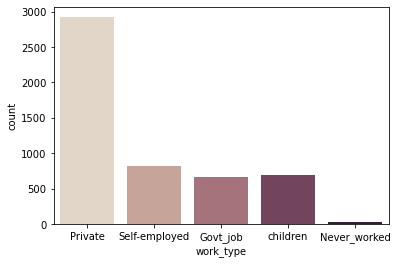

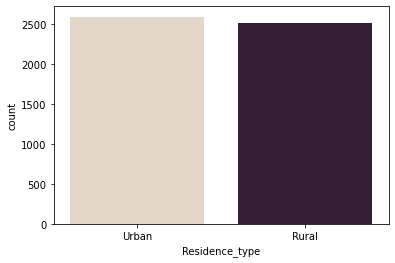

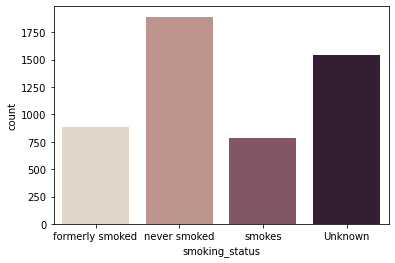

In [269]:
for col in cat_cols: 
    sns.countplot(df[col], palette="ch:.25")
    plt.show(block=True)

### Analyzing Target Variable

In [270]:
df["stroke"].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

<AxesSubplot:xlabel='stroke', ylabel='count'>

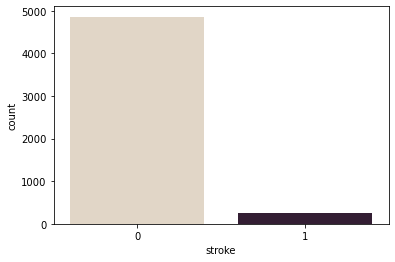

In [271]:
sns.countplot(df["stroke"], palette="ch:.25")

([<matplotlib.patches.Wedge at 0x24839e02eb0>,
 [Text(-1.0871361453364168, 0.16773491438301516, '0'),
  Text(1.284797260350331, -0.19823218657998906, '1')],
 [Text(-0.5929833520016818, 0.09149177148164463, '95.1%'),
  Text(0.7906444679078961, -0.12198903789537788, '4.9%')])

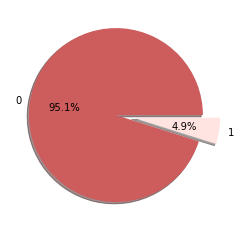

In [272]:
plt.pie(df["stroke"].value_counts(), labels=[0,1], shadow=True, colors=["indianred", "mistyrose"], explode=(0,0.2), autopct="%1.1f%%")

*Ratio of 1s is %4.9*

### Checking for Outliers in Numerical Variables

Iqr was used when checking for outliers

In [273]:
def check_outliers(df, numerical_cols, low_threshold=0.1, up_threshold=0.9):
    outlier_cols = []
    for col in numerical_cols:
        q1 = df[col].quantile(low_threshold)
        q3 = df[col].quantile(up_threshold)
        interquantile = q3 - q1
        up_limit = q3 + 1.5 * interquantile
        low_limit = q1 - 1.5 * interquantile
        if df[(df[col] > up_limit) | (df[col] < low_limit)].any(axis=None):
            outlier_cols.append(col)
    if not outlier_cols:
        print("There is no outliers")
    return outlier_cols

In [274]:
outlier_cols = check_outliers(df, num_cols)

In [275]:
print(outlier_cols)

['bmi']


*There are outliers in "bmi"*

### Correlation

<AxesSubplot:>

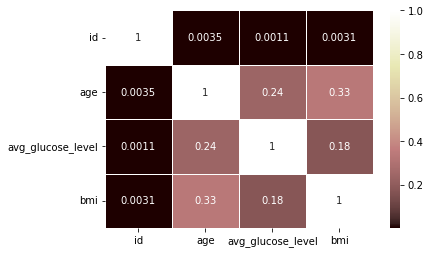

In [276]:
sns.heatmap(df[num_cols].corr(), annot=True, linewidths=0.5, cmap="pink")

*There are no highly correlated columns*

### Target Variable vs Numerical Columns

In [277]:
for col in num_cols:
    print(df.groupby("stroke").agg({col:"mean"}), end="\n\n")

                  id
stroke              
0       36487.236371
1       37115.068273

              age
stroke           
0       41.971545
1       67.728193

        avg_glucose_level
stroke                   
0              104.795513
1              132.544739

              bmi
stroke           
0       28.823064
1       30.471292



According to the results, the probability of having a stroke increases with age, glucose level and bmi

### Target Variable vs Categorical Columns

In [278]:
for col in cat_cols:
    print(pd.DataFrame({"target_mean": df.groupby(col)["stroke"].mean()}), end="\n\n")

              target_mean
hypertension             
0                0.039679
1                0.132530

               target_mean
heart_disease             
0                 0.041787
1                 0.170290

        target_mean
stroke             
0               0.0
1               1.0

        target_mean
gender             
Female     0.047094
Male       0.051064
Other      0.000000

              target_mean
ever_married             
No               0.016505
Yes              0.065613

               target_mean
work_type                 
Govt_job          0.050228
Never_worked      0.000000
Private           0.050940
Self-employed     0.079365
children          0.002911

                target_mean
Residence_type             
Rural              0.045346
Urban              0.052003

                 target_mean
smoking_status              
Unknown             0.030440
formerly smoked     0.079096
never smoked        0.047569
smokes              0.053232



According to the results,
* People with hypertension are more likely to have a stroke
* People with heart disease are more likely to have a stroke
* The probability of having a stroke is higher in men
* People who have been married are more likely to have a stroke
* People who are self-employed are more likely to have a stroke
* The probability of having a stroke is higher in urban life
* The probability of having a stroke is higher in formerly smoked people

## Data Preprocessing & Feature Engineering

### Filling Missing Values

Missing values were filled with the median

In [279]:
df.fillna(df["bmi"].median(),inplace=True)

### Label Encoder

Label encoder was applied to binary columns

In [280]:
binary_cols = [col for col in df.columns if df[col].dtype not in ["int64", "float64"] and df[col].nunique() == 2]

In [281]:
binary_cols

['ever_married', 'Residence_type']

In [282]:
le = LabelEncoder()

In [283]:
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

In [284]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,1,Self-employed,0,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,1,Private,1,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1


### One-Hot Encoder

One-hot encoder was applied to columns with more than 2 categories

In [285]:
ohe_cols = [col for col in df.columns if 2 < df[col].nunique() < 10]

In [286]:
ohe_cols

['gender', 'work_type', 'smoking_status']

In [287]:
df = pd.get_dummies(df, columns=ohe_cols, drop_first=True)

In [288]:
df.head()

,id,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,1,1,228.69,36.6,1,1,0,0,1,0,0,1,0,0
1,51676,61.0,0,0,1,0,202.21,28.1,1,0,0,0,0,1,0,0,1,0
2,31112,80.0,0,1,1,0,105.92,32.5,1,1,0,0,1,0,0,0,1,0
3,60182,49.0,0,0,1,1,171.23,34.4,1,0,0,0,1,0,0,0,0,1
4,1665,79.0,1,0,1,0,174.12,24.0,1,0,0,0,0,1,0,0,1,0


### Dealing with Outliers

Using the iqr method, outliers were replaced with their upper and lower limits

In [289]:
def replace_with_thresholds(df, col, low_threshold=0.1, up_threshold=0.9):
    q1 = df[col].quantile(low_threshold)
    q3 = df[col].quantile(up_threshold)
    interquantile = q3 - q1
    up_limit = q3 + 1.5 * interquantile
    low_limit = q1 - 1.5 * interquantile
    df.loc[(df[col] < low_limit), col] = low_limit
    df.loc[(df[col] > up_limit), col] = up_limit

In [290]:
for col in outlier_cols:
    replace_with_thresholds(df, col)

Checked for outliers again

In [291]:
check_outliers(df, num_cols)

There is no outliers


[]

### Feature Scaling

Min-Max Scaler was applied to "age", "bmi" and "avg_glucose_level"

In [292]:
sc = MinMaxScaler()

In [293]:
df["age"] = sc.fit_transform(df[["age"]])
df["bmi"] = sc.fit_transform(df[["bmi"]])
df["avg_glucose_level"] = sc.fit_transform(df[["avg_glucose_level"]])

In [294]:
df.head()

,id,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,0.816895,0,1,1,1,0.801265,0.464541,1,1,0,0,1,0,0,1,0,0
1,51676,0.743652,0,0,1,0,0.679023,0.314404,1,0,0,0,0,1,0,0,1,0
2,31112,0.975586,0,1,1,0,0.234512,0.392122,1,1,0,0,1,0,0,0,1,0
3,60182,0.597168,0,0,1,1,0.536008,0.425682,1,0,0,0,1,0,0,0,0,1
4,1665,0.963379,1,0,1,0,0.549349,0.241985,1,0,0,0,0,1,0,0,1,0


## Model Building

In [295]:
y = df["stroke"]
X = df.drop(["stroke", "id"], axis=1)

In [296]:
models = [("LR", LogisticRegression()),
          ("KNN", KNeighborsClassifier()),
          ("DecisionTree", DecisionTreeClassifier()),
          ("RF", RandomForestClassifier()),
          ("SVC", SVC()),
          ("GBM", GradientBoostingClassifier()),
          ("XGBoost", XGBClassifier()),
          ("LightGBM", LGBMClassifier())]

In [297]:
for name, regressor in models:
    cv = cross_validate(regressor, X, y, cv=5, scoring=["accuracy", "f1", "recall", "precision"])
    print(f'{name} \n {"Accuracy"}:{cv["test_accuracy"].mean()} \n {"Recall"}:{cv["test_recall"].mean()} \n {"Precision"}:{cv["test_precision"].mean()} \n {"F-Score"}:{cv["test_f1"].mean()}')

LR 
 Accuracy:0.9514677103718199 
 Recall:0.004081632653061224 
 Precision:0.2 
 F-Score:0.007999999999999998
KNN 
 Accuracy:0.9506849315068493 
 Recall:0.028163265306122447 
 Precision:0.5666666666666667 
 F-Score:0.05262994086523498
DecisionTree 
 Accuracy:0.9123287671232877 
 Recall:0.2003265306122449 
 Precision:0.16380981763334707 
 F-Score:0.1789638330101558
RF 
 Accuracy:0.949706457925636 
 Recall:0.012081632653061225 
 Precision:0.2 
 F-Score:0.022657952069716776
SVC 
 Accuracy:0.9512720156555773 
 Recall:0.0 
 Precision:0.0 
 F-Score:0.0
GBM 
 Accuracy:0.9483365949119372 
 Recall:0.0 
 Precision:0.0 
 F-Score:0.0
XGBoost 
 Accuracy:0.9434442270058708 
 Recall:0.06816326530612245 
 Precision:0.23186507936507939 
 F-Score:0.10481908638625055
LightGBM 
 Accuracy:0.9452054794520549 
 Recall:0.052000000000000005 
 Precision:0.23306722689075632 
 F-Score:0.08223761574900616


*This is an imbalanced dataset so acurracy scores are high but other scores are low. Sampling can be use.*

## Sampling

### SMOTE

In [298]:
from imblearn.over_sampling import SMOTE

In [299]:
sm = SMOTE()

In [300]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [301]:
sum(y_train == 1) 

204

*There are 204 data equal to 1*

In [302]:
sum(y_train == 0)

3884

*There are 3884 data equal to 0*

In [303]:
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

In [304]:
sum(y_train_smote == 1)

3884

*There are 3884 data equal to 1*

In [305]:
sum(y_train_smote == 0)

3884

*There are 3884 data equal to 0*

In [306]:
for name, regressor in models:
    regressor.fit(X_train_smote, y_train_smote)
    pre = regressor.predict(X_test)
    print(f'{name}\nConfusion Matrix: \n{confusion_matrix(y_test, pre)}\n{classification_report(y_test, pre)}\n')

LR
Confusion Matrix: 
[[696 281]
 [  8  37]]
              precision    recall  f1-score   support

           0       0.99      0.71      0.83       977
           1       0.12      0.82      0.20        45

    accuracy                           0.72      1022
   macro avg       0.55      0.77      0.52      1022
weighted avg       0.95      0.72      0.80      1022


KNN
Confusion Matrix: 
[[771 206]
 [ 29  16]]
              precision    recall  f1-score   support

           0       0.96      0.79      0.87       977
           1       0.07      0.36      0.12        45

    accuracy                           0.77      1022
   macro avg       0.52      0.57      0.49      1022
weighted avg       0.92      0.77      0.83      1022


DecisionTree
Confusion Matrix: 
[[836 141]
 [ 30  15]]
              precision    recall  f1-score   support

           0       0.97      0.86      0.91       977
           1       0.10      0.33      0.15        45

    accuracy                      

Logistic Regression can be use with %82 recall score

## References

* Miuul Machine Learning Summer Camp
* https://seaborn.pydata.org/generated/seaborn.barplot.html
* https://seaborn.pydata.org/tutorial/categorical.html
* https://www.w3schools.com/python/matplotlib_pie_charts.asp
* https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/